In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

In [2]:
df = pd.read_csv("/home/atrides/Desktop/R/statistics_with_Python/10_GLM1_ANOVA/Data_Files/Viagra.dat", sep='\t')
df.head()

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4


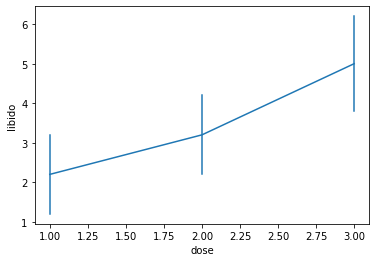

In [3]:
# lineplot
_ = sns.lineplot(x='dose', y='libido', data = df, err_style='bars')

In [4]:
# describing statistical properties
df.groupby('dose')['libido'].describe()

,count,mean,std,min,25%,50%,75%,max
dose,,,,,,,,
1,5.0,2.2,1.303840,1.0,1.0,2.0,3.0,4.0
2,5.0,3.2,1.303840,2.0,2.0,3.0,4.0,5.0
3,5.0,5.0,1.581139,3.0,4.0,5.0,6.0,7.0


In [5]:
# ideal value for normal distribution , skewness = 0 , excess of kurtosis(here, same as kurtosis) = 0
for i in sorted(df['dose'].unique()):
    print(f'For group with dose = {i} : ')
    print(st.describe(df[df['dose']==i].libido), '\n')

For group with dose = 1 : 
DescribeResult(nobs=5, minmax=(1, 4), mean=2.2, variance=1.7, skewness=0.36317347441943004, kurtosis=-1.3719723183391002) 

For group with dose = 2 : 
DescribeResult(nobs=5, minmax=(2, 5), mean=3.2, variance=1.7, skewness=0.36317347441943004, kurtosis=-1.3719723183391006) 

For group with dose = 3 : 
DescribeResult(nobs=5, minmax=(3, 7), mean=5.0, variance=2.5, skewness=0.0, kurtosis=-1.3) 



In [6]:
df_dose1 = df[df['dose']==1]
df_dose2 = df[df['dose']==2]
df_dose3 = df[df['dose']==3]

In [7]:
# Levene's Test for Homogeneity of Variance (center = median(by default))
stat, p = st.levene(df_dose1['libido'], df_dose2['libido'], df_dose3['libido'])
print(stat, p)

0.11764705882352934 0.8900225182757423


#### # since the above p value is not significant , i.e, p>.05, we can say that homogeneity of variance is maintained. just for the sake of visualization I am going to draw the boxplot .

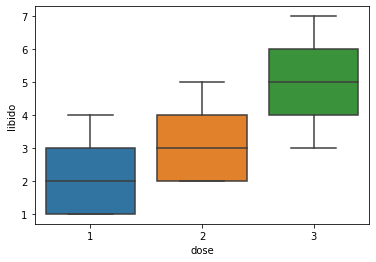

In [8]:
_ = sns.boxplot(x='dose', y='libido', data=df)

In [9]:
from statsmodels.formula.api import ols
m01 = ols('libido~C(dose)', data=df).fit()
m01.summary()

/home/atrides/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Wed, 28 Oct 2020   Prob (F-statistic):             0.0247
Time:                        12:51:33   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.2000      0.627      3.508      0.004       0.834       3.566
C(dose)[T.2]     1.0000      0.887      1.127      0.282      -0.932       2.932
C(dose)[T.3]     2.8000      0.887      3.157      0.008       0.868       4.732
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
anova_table = sm.stats.anova_lm(m01)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,20.133333,10.066667,5.118644,0.024694
Residual,12.0,23.600000,1.966667,NaN,NaN


#### # making some plots for assumption checking

In [11]:
prediction = pd.DataFrame(m01.fittedvalues)
prediction.columns = ['predicted'] 
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()
prediction.head()

,predicted,standarized_prediction
0,2.2,-1.056254
1,2.2,-1.056254
2,2.2,-1.056254
3,2.2,-1.056254
4,2.2,-1.056254


In [12]:
import statsmodels.stats.outliers_influence as sms
summary_frame = sms.OLSInfluence(m01).summary_frame()
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)
summary_frame .head()

,dfb_Intercept,dfb_C(dose)[T.2],dfb_C(dose)[T.3],cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits,predicted,standarized_prediction
0,0.310630,-0.219649,-0.219649,0.033898,0.637793,0.2,0.318896,0.621261,0.310630,2.2,-1.056254
1,-0.076411,0.054031,0.054031,0.002119,-0.159448,0.2,-0.079724,-0.152822,-0.076411,2.2,-1.056254
2,-0.476513,0.336945,0.336945,0.076271,-0.956689,0.2,-0.478345,-0.953025,-0.476513,2.2,-1.056254
3,-0.476513,0.336945,0.336945,0.076271,-0.956689,0.2,-0.478345,-0.953025,-0.476513,2.2,-1.056254
4,0.754780,-0.533710,-0.533710,0.171610,1.435034,0.2,0.717517,1.509560,0.754780,2.2,-1.056254


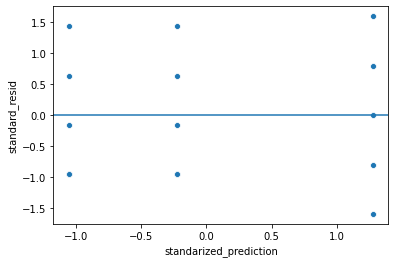

In [13]:
_ = sns.scatterplot(y = 'standard_resid', x='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

#### # This graph can be used for testing homogeneity of variance. We encountered this kind of plot previously; essentially, if it has a funnel shape then we’re in trouble. The plot we have shows points that are equally spread for the three groups, which implies that variances are similar across groups (which was also the conclusion reached by Levene’s test).

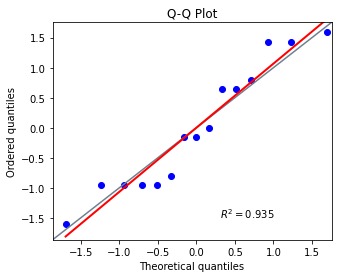

In [14]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

#### # The second plot is a Q-Q plot , which tells us something about the normality of residuals in the model. We want our residuals to be normally distributed, which means that the dots on the graph should cling  to the diagonal line. Ours look like they have had a bit of an argument with the diagonal line, which suggests that we may not be able to assume normality of errors and should perhaps use a robust version of ANOVA instead.

In [15]:
# Doing Welch anova in the case if homogeniety of variance  is violated(our data here dont need this test)
aov = pg.welch_anova(dv='libido', between='dose', data=df)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,dose,2,7.943375,4.320451,0.053738,0.460366


## Robust ANOVA (for independent samples)

In [16]:
st.kruskal(df_dose1['libido'], df_dose2['libido'], df_dose3['libido'])

KruskalResult(statistic=6.200000000000009, pvalue=0.0450492023935576)

# Planned Comparison

#### https://www.statsmodels.org/devel/examples/notebooks/generated/contrasts.html#examples-notebooks-generated-contrasts--page-root 

In [17]:
contrast1 = [-2,1,1]
contrast2 = [0,-1,1]

In [18]:
contrast = np.vstack((contrast1, contrast2))
contrast = contrast.T
print(contrast)

[[-2  0]
 [ 1 -1]
 [ 1  1]]


In [19]:
m02 = ols("libido ~ C(dose, contrast)", data=df).fit()
m02.summary()

/home/atrides/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Wed, 28 Oct 2020   Prob (F-statistic):             0.0247
Time:                        12:51:35   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.4667      0.362      9.574      0.000       2.678       4.256
C(dose, contrast)[custom0]     0.6333      0.256      2.474      0.029       0.075       1.191
C(dose, contrast)[custom1]     0.9000      0.443      2.029      0.065      -0.066       1.866
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         1.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Trend Analysis

In [20]:
from patsy.contrasts import Poly
levels = df.dose.unique().tolist()
contrast = Poly().code_without_intercept(levels)
print(contrast.matrix)

[[-7.07106781e-01  4.08248290e-01]
 [-5.55111512e-17 -8.16496581e-01]
 [ 7.07106781e-01  4.08248290e-01]]


In [21]:
m03 = ols("libido ~ C(dose, Poly)", data=df).fit()
m03.summary()

/home/atrides/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Wed, 28 Oct 2020   Prob (F-statistic):             0.0247
Time:                        12:51:36   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.4667      0.362      9.574      0.000       2.678       4.256
C(dose, Poly).Linear        1.9799      0.627      3.157      0.008       0.613       3.346
C(dose, Poly).Quadratic     0.3266      0.627      0.521      0.612      -1.040       1.693
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         1.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Post-hoc tests

In [22]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [23]:
multicomp = MultiComparison(df['libido'], df['dose'])   # testfunc

#### # https://pythonhealthcare.org/2018/04/13/55-statistics-multi-comparison-with-tukeys-test-and-the-holm-bonferroni-method/
#### # https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html

In [24]:
# Bonferroni
com = multicomp.allpairtest(st.ttest_ind, method='bonf')
print(com[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     1      2 -1.2127 0.2598    0.7795  False
     1      3 -3.0551 0.0157    0.0471   True
     2      3  -1.964 0.0851    0.2554  False
---------------------------------------------


In [25]:
# Holm
comp = multicomp.allpairtest(st.ttest_ind, method='Holm')
print (comp[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     1      2 -1.2127 0.2598    0.2598  False
     1      3 -3.0551 0.0157    0.0471   True
     2      3  -1.964 0.0851    0.1703  False
---------------------------------------------


In [26]:
# Tukey HSD
co = multicomp.tukeyhsd(alpha=0.05)
co.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.0,0.5171,-1.3651,3.3651,False
1,3,2.8,0.0209,0.4349,5.1651,True
2,3,1.8,0.1472,-0.5651,4.1651,False


### another library for post-hoc tests
#### # https://scikit-posthocs.readthedocs.io/en/latest/posthocs_api/

In [27]:
import scikit_posthocs as sk_ph

In [28]:
sk_ph.posthoc_tukey_hsd(df['libido'], df['dose'])

,1,2,3
1,1,0,1
2,0,1,0
3,1,0,1


In [29]:
sk_ph.posthoc_tukey(df, val_col = 'libido', group_col='dose')

,1,2,3
1,1.000000,0.517078,0.020851
2,0.517078,1.000000,0.147239
3,0.020851,0.147239,1.000000


## Robust Post-hoc test

In [30]:
sk_ph.posthoc_wilcoxon(df, val_col = 'libido', group_col='dose')

/home/atrides/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,1,2,3
1,1.000000,0.197466,0.038434
2,0.197466,1.000000,0.041227
3,0.038434,0.041227,1.000000


#### # from above table it seems that groups (1,3) and (2,3) are significant.


In [31]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,20.133333,10.066667,5.118644,0.024694
Residual,12.0,23.600000,1.966667,NaN,NaN


In [32]:
SSt = 43.73
SSm = 20.133
SSr = 23.6

In [33]:
R_squared = SSm/SSt    # here R_squared is called eta_squared
R_squared

0.4603933226617883

In [34]:
effect_size = np.sqrt(R_squared)   #R
effect_size

0.6785228976694805

#### # a more complex measure is omega-squared , which adjust for the fact that we are doing finding effect size for population and not just our sample

In [35]:
MSr = 1.967
df_m = 2
ω2 = (SSm-df_m*MSr)/(SSt+MSr)
ω2

0.35448716545943937

In [36]:
ω = np.sqrt(ω2)       # ω, more accurate measure of R, treat ω as unbiased R
ω

0.5953882476665452

In [37]:
# effect sizes for different pair of groups
def s_within(s1,s2,n1,n2):
    return np.sqrt((((n1-1)*(s1**2))+((n2-1)*(s2**2)))/(n1+n2-2))

def mes(m1, m2, s1, s2, n1, n2):
    s_ = s_within(s1,s2,n1,n2)
    d = (m1-m2)/s_   # cohen's D
    d_var = (n1+n2)/(n1*n2) + (d**2)/(2*(n1+n2))    # variance of d 
    
    df = n1+n2-2
    J = 1-3/(4*df-1)   # correction factor
    
    g = J*d          #   Hedges' g
    
    g_var = (J**2)*d_var     #   variance of g
    
    a = (n1+n2)**2/(n1*n2)    # a corrects for inbalance in n1 & n2
    
    r = d/np.sqrt(d**2+a)  # correlation coeffecient
    
    r_var = (a**2 * d_var)/((d**2 + a)**3)     #   variance of r
    
    
    print(f'Cohen\'s d: {d}, var.d: {d_var}')
    print(f'Hedge\'s g: {g}, var.g: {g_var}')
    print(f'Correlation coeffecient: {r}, var.r: {r_var}')

In [38]:
mes(2.2, 3.2, 1.3038405, 1.3038405, 5, 5)

Cohen's d: -0.766964977694741, var.d: 0.42941176385051477
Hedge's g: -0.6927425604984757, var.g: 0.35032135573236584
Correlation coeffecient: -0.358057432480627, var.r: 0.07113066705088723


In [39]:
mes(2.2, 5, 1.3038405, 1.5811388, 5, 5)

Cohen's d: -1.9321835766692816, var.d: 0.5866666686975249
Hedge's g: -1.7451980692496738, var.g: 0.47861255802170605
Correlation coeffecient: -0.6948083357346259, var.r: 0.020296034848250884


In [40]:
mes(3.2, 5, 1.3038405, 1.5811388, 5, 5)

Cohen's d: -1.2421180135731096, var.d: 0.4771428579821404
Hedge's g: -1.1219130445176473, var.g: 0.3892611869490094
Correlation coeffecient: -0.5275893456556138, var.r: 0.04482985658637296


#### # The standard deviation of the effect size is of critical importance, since it indicates how much uncertainty is included in the measurement. A standard deviation that is too large will make the measurement nearly meaningless.

# Effect sizes for the orthogonal contrasts

In [41]:
def r_contrast(t,df):
    return np.sqrt(t**2/(t**2+df))

In [42]:
dof = 15-2-1   # N-p-1 for normal regression , p is the number of predictors (in this case 2, the two con-trast variables
print(r_contrast(2.474, dof))

0.5811824584137868


In [43]:
dof = 15-2-1   # N-p-1 for normal regression , p is the number of predictors (in this case 2, the two con-trast variables
print(r_contrast(2.029, dof))

0.5054079701225639


#### # Both effects are fairly large.